#1. 분류(Classification)
 - 분류(Classification)
  - 학습데이터로 주어진 데이터의 피처와 라벨 값(범주값)을 머신러닝 알고리즘으로 학습 / 모델에 새로운 피쳐(feature) 값이 주어지면 라벨 값(범주)를 예측
 - 다양한 분류 알고리즘이 있으며 많이 활용되고 있음

- 0. 선형모형
 - 로지스틱 회귀(Logistic Regression): 독립변수와 종속변수의 선형 관계성에 기반

- 1. Tree 기반 모형
 - 결정나무(Decision Tree): 타겟 변수 범주 분포의 균일함에 대한 규칙 기반
 - 랜덤 포레스트(Random Forest): Tree 모형들을 결합한 앙상블(Ensemble) 모형 중 배깅 모형

- 2. 확률과 거리 기반
 - 나이브 베이즈(Naive Bayes): 베이즈(Bayes) 통계 기반
 - KNN: 근접 거리를 기준으로 하는 근접 이웃 기반 (Nearest Neighbor)

- 3. 부스팅 모형
 - Adaboost: Tree 등 Weak Learner 모형들을 순차적으로 결합한 앙상블(Ensemble) 모형 중 부스팅
 - Gradient Boosting 등

- 4. 비선형 & 블랙박스 모형
 - 서포트 벡터 머신(Support Vector machine): 개별 클래스 간의 최대 분류 마진을 효과적으로 발견
 - 인공신경망: 은닉층을 통한 비선형 변환을 통한 분류



 # 1. Tree 기반 분류: DT와 Random Forest
 - DT: 비교적 쉽게 적용할 수 있는 모형
 - 데이터 스케일링 등 전처리의 영향이 상대적으로 적음
 - 과적합(Overfitting)의 발생

 - 결정 트리(Decision Tree, 의사결정트리, 의사결정나무 등): 분류(Classification)와 회귀(Regression) 모두 가능
- 예: 매, 펭귄, 돌고래, 곰 분류
<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwlH1u%2FbtqwWZI9Xen%2FkFJDjGSFJAPxhyatC3Xhs0%2Fimg.png' width=700 height=300>
</figure>

- Tree?
 - Binary Tree?
 - 특정 기준(질문)에 따라 데이터를 구분

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdy5OwG%2FbtqDwdHofoT%2FNtDy9lqXkhWTRTwEz6txd0%2Fimg.png' width=700 height=300>
</figure>


- 타겟 변수 범주 분포의 불순도

<figure>
    <img src='https://blog.kakaocdn.net/dn/dhoo7N/btqDvzqEhPH/QdOsfkqc2hcwHISIh0peo1/img.png' width=700 height=300>
</figure>

 - A, B, C 중에서 균일한 정도는? 균일한 순서는? 분류모형과의 의미는?
 - 측정: 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니계수, Chi-square 등등

- 불순도(Impurity)
 - 서로 다른 범주가 얼마나 혼재하는지를 측정


<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqLXhZ%2FbtqwWyZl6iV%2FUZnQbf9L5HAFzf6hFfxK71%2Fimg.png' width=400 height=300>
</figure>


 - 엔트로피(Entropy)와 정보이득(Information Gain): 불순도(Impurity)를 측정, 엔트로피가 높으면 불순도가 높음. 엔트로피가 1이면 불순도가 최대. 즉, 한 범주 안에 서로 다른 데이터가 정확히 반반 있음. 엔트로피가 0이면 불순도는 최소. 한 범주 안에 하나의 데이터만 있음. 정보 이득(Information Gain)은 엔트로피를 사용하여 측정, 1에서 엔트로피 지수를 뺀 값으로 1-엔트로피 지수. 정보이득이 높으면 분류가 잘 된 것으로 이해할 수 있음

 - 지니 계수(Gini Index): 불평등 지수를 나타내는 값으로 0이 가장 평등(균일)하고 1에 가까우면 불평등함(다양함). 지니 계수가 낮을수록 데이터 균일도가 높은 상태이므로, 계수가 낮은 feature의 rule을 찾음


In [1]:
import pandas as pd
import numpy as np
credit = pd.read_csv("creditset.csv") # creditset2.csv를 credit로 읽기
# credit의 default10yr가 Y변수, loan, income, age가 X변수
Y=credit.default10yr
X=credit[["loan", "age","income"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2).fit( x_train , y_train )

dt.score( x_test, y_test )  #정분류율 (입력된 X,Y로 계산...)
pred = dt.predict( x_test ) #예측된 Y값을 출력 Y:실제 Y값
np.mean( pred == y_test )  #정분류율 계산

from sklearn.metrics import accuracy_score, classification_report
accuracy_score( pred, y_test)  #정분류율
print( classification_report( pred, y_test) )

0.925



#2. sklearn에서 DT의 주요 hyperparameter

1) max_depth
 - 트리의 최대 깊이를 규정
 - 과적합과 관련
 - defualt 는 None이며, 분류가 잘 이뤄질 때까지 깊이를 더해나가고 노드가 가지는 데이터 개수가 min_samples_split 보다 작아질 때까지 게속 깊이를 증가

2) max_features
 - 최적의 분할을 위해 고려할 최대 변수의 개수, 디폴트는 None으로 X변수들의 전체를 사용해 분류
 - int 형: 대상 피처의 개수, float 형: 전체 피처 중 대상 피처의 퍼센트임.
 - 'sqrt': 전체 피처 중 sqrt(전체 피처 개수) 즉 ${\sqrt {전체 피처}}$개수 지정
 - 'auto': sqrt와 동일
 - 'log': 전체 피처 중 log2(전체 피처 개수) 선정
 - 'None': 전체 피처 선정

3) min_samples_split
 - 노드를 분기가 일어나기 위한 최소한의 샘플 데이터 수(node내 observation의 수)로 과적합을 관리하는데 사용할 수 있음
 - 디폴트는 2, 작을 수록 과적합 가능성 증가

4) min_samples_leaf
 - Terminal 노드(leaf)가 되기 위한 최소한의 Obs.의 수
 - min_samples_split와 유사하게 과적합 관리에 활용
 - 불균형 타겟변수에 대한 분류 시 작은 값으로 설정

5) max_leaf_nodes
 - Leaf 최대 개수

**가상의 데이터로 분류**

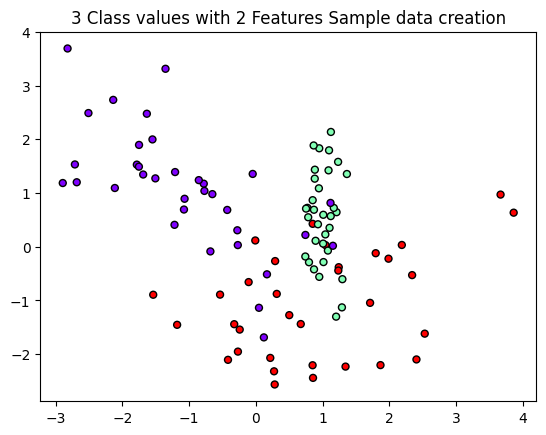

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)

    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

<ipython-input-4-17c44a6c1033>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


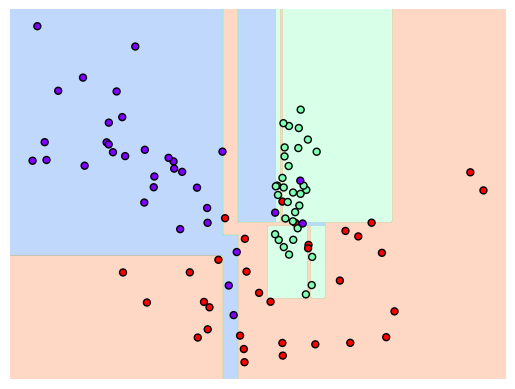

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

<ipython-input-4-17c44a6c1033>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


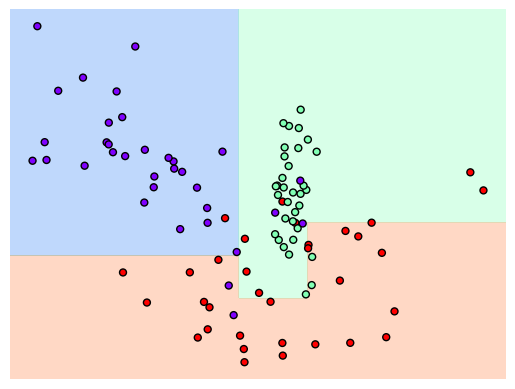

In [ ]:
# 하이퍼파라미터를 변경하며 수행: 예) min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 예제 학습데이터 정의

In [2]:
import pandas as pd
import numpy as np
# 데이터 정의
data = pd.DataFrame({"no_insects":["True","True","True","False","True","True","True","True","True","False"],
                     "no_dead":["True","True","False","True","True","True","False","False","True","False"],
                     "no_wilting":["True","True","True","True","True","True","False","True","True","True"],
                     "no_diseases":["True","True","False","True","True","True","False","False","True","True"],
                     "tree_health":["Good","Good","Poor","Good","Good","Good","Poor","Poor","Good","Poor"]},
                    columns=["no_insects","no_dead","no_wilting","no_diseases","tree_health"])
# 기술 속성(descriptive features)
features = data[["no_insects","no_dead","no_wilting","no_diseases"]]
# 대상 속성(target feature)
target = data["tree_health"]
print(data)


  no_insects no_dead no_wilting no_diseases tree_health
0       True    True       True        True        Good
1       True    True       True        True        Good
2       True   False       True       False        Poor
3      False    True       True        True        Good
4       True    True       True        True        Good
5       True    True       True        True        Good
6       True   False      False       False        Poor
7       True   False       True       False        Poor
8       True    True       True        True        Good
9      False   False       True        True        Poor


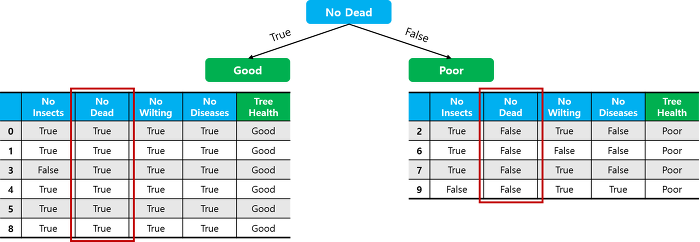

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder().fit(features.no_insects).transform( features.no_insects )
features.columns

Index(['no_insects', 'no_dead', 'no_wilting', 'no_diseases'], dtype='object')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

cat_cols = [c for c in features.columns if features[c].dtypes=='O']
num_cols = [c for c in features.columns if features[c].dtypes!='O']

cat_cols

['no_insects', 'no_dead', 'no_wilting', 'no_diseases']

In [5]:
features_enc = features

for i in cat_cols:
  features_enc[i] = LabelEncoder().fit_transform(features[i])

features_enc

dt = DecisionTreeClassifier()
dt.fit( features_enc, target)
dt.score(features_enc, target)
print( dt.tree_.children_left )
print( dt.tree_.children_right )

[ 1 -1 -1]
[ 2 -1 -1]


<ipython-input-5-e149d940a920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_enc[i] = LabelEncoder().fit_transform(features[i])
<ipython-input-5-e149d940a920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_enc[i] = LabelEncoder().fit_transform(features[i])
<ipython-input-5-e149d940a920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

# 3. DT 시각화

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(min_samples_leaf=6,random_state=156)

# iris 데이터
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# 학습
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_leaf=6, random_state=156)

In [7]:
from sklearn.tree import export_graphviz
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [8]:
!pip install graphviz

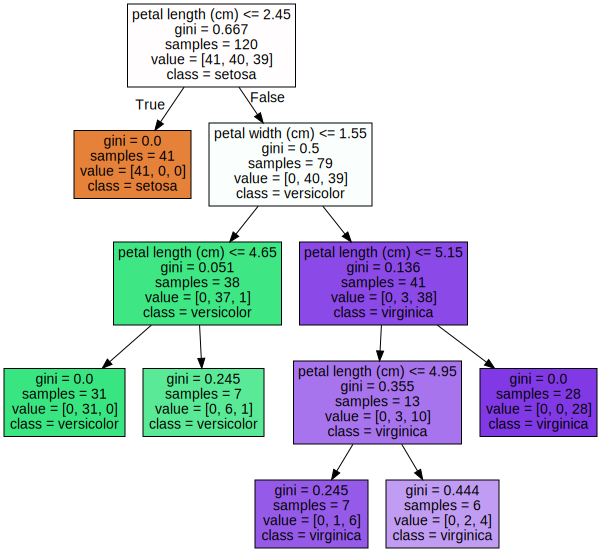

In [9]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

# 4. Decision Tree 연습

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) # stratify : target
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [11]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_pred)))

Accuracy on training set: 0.958
Accuracy on test set: 1.000


In [12]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

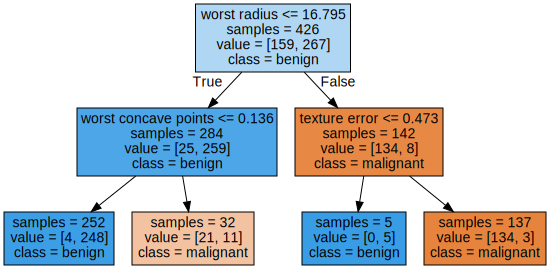

In [13]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [14]:
cancer.feature_names
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

- Feature Importance in trees

In [15]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05393525
 0.         0.         0.         0.         0.         0.
 0.         0.         0.80998121 0.         0.         0.
 0.         0.         0.         0.13608354 0.         0.        ]


In [16]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

NameError: ignored